<h1 align=right><font size = 2>Last Update on 7-Jun-2020 </font></h1>

<h1 align=center><font size = 6>MOS SUMMARY REPORT - 2020 </font></h1>


<img src = "https://drive.google.com/uc?export=view&id=1s8HGLgIfsnFqo4MrRScRrrtnZn45x9DB" align="left" width=90000>

<a id='id0'></a>
## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. __Monthly Reports__ (Efficiency, Hours, Site, Training, Projects, Leaves and Occupancy Data)<br> 
1.1 [__January__](#id2)<br>
</div>
<hr>

In [176]:
#Importing required Libraries

import pandas as pd
import numpy as np
import datetime as dtf

import matplotlib as mpl
import matplotlib.pyplot as plt
from calendar import monthrange
import calendar
%matplotlib inline

from IPython.display import HTML

In [352]:
# Below code is to Toggle On/Off code

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
# Exporting CSV from Gdrive to Pandas Data Frame format

csv_path='https://drive.google.com/open?id=1T-LPVaN54hHb6WUUZXFYr4eCg5sQ9rrA'
csv_path=csv_path.replace('open','uc')+'&export=download'
dfo=pd.read_csv(csv_path)


# Extracting Due hours from CSV file as stated at the top

dHrs_path='https://drive.google.com/open?id=1vbkCrkqUYil1nBbAJbKj2MXP0Ac0PV18'
dHrs_path=dHrs_path.replace('open','uc')
dHrs_path=dHrs_path+'&export=download'
df_mhrs=pd.read_csv(dHrs_path)
#df_mhrs.head()


In [177]:
# Renaming Columns for convenience, and deleting unwanted columns

df=dfo
df.rename(columns={'Eng':'Initials',
                  'Emp. Name':'Name',
                  'Project No.':'pCode',
                  'Normal Hrs':'nHrs',
                  'OT':'oHrs',
                  'travel Hrs':'tHrs'},inplace=True)
df=df.drop(['Spare1','Spare2','Spare3','Spare4','Spare5','Spare6','ADZ'],axis=1)
df['Remark']=df['Remark'].str.upper()
df['pCode']=df[['pCode']].astype(str)
#






#C

df=dfo
df.rename(columns={'Eng':'Initials',
                  'Emp. Name':'Name',
                  'Project No.':'pCode',
                  'Normal Hrs':'nHrs',
                  'OT':'oHrs',
                  'travel Hrs':'tHrs'},inplace=True)
df=df.drop(['Spare1','Spare2','Spare3','Spare4','Spare5','Spare6','ADZ'],axis=1)
df['Remark']=df['Remark'].str.upper()
df['pCode']=df[['pCode']].astype(str)


#C
c1=df['Remark']=='E' 
c2=df['Remark']=='ER'
df.loc[(df['pCode'].str.startswith('3') &  c1), 'Remark'] = 'SE'
df.loc[(df['pCode'].str.startswith('3') &  c2), 'Remark'] = 'SER'


#C
df['Date'] = pd.to_datetime(df['Date'])
df[['pCode']]=df[['pCode']].astype(str)



#C
#This code will correct Weekend entries where employees have selected 'F' instead of 'U' on weekends.
#A type 'F' is used to count number of legal (Annual) holidays. Therefore, 'U' (weekends) should not be included in 'F'.
c2=df['Date'].dt.day_name()=='Friday'
c4=df['Date'].dt.day_name()=='Saturday'
c6=df['Remark']=='UR'
c7=df['Remark']=='F'


df_correction=df[(c2 | c4) & (c6 |c7)]
#df_correction=df[(c2 | c4)]
df.loc[(c2 | c4) & (c6 | c7),'Remark']='U'




#C
# Replace Empty Cells with 0 (zero) values --- (AND RESULTING CLEAN DATA)

df['nHrs']=df['nHrs'].replace(np.nan,0.0)
df['oHrs']=df['oHrs'].replace(np.nan,0.0)
df['tHrs']=df['tHrs'].replace(np.nan,0.0)

#df['ADZ']=df['ADZ'].replace(np.nan,0)
#df[['ADZ']]=df[['ADZ']].astype(int)
if ('Remark' in df):
    df['Remark']=df['Remark'].replace(np.nan,'A')
    df['Remark']=df['Remark'].str.upper()
    df['Remark']=df['Remark'].replace({'U':'Public Holidays-U',
                                       'UR':'Public Holidays-UR',
                                       'F':'Legal Holidays-F',
                                       'FR':'Legal Holidays-FR',
                                       'I':'Internal-I',
                                       'A':'Site-A',
                                       'D':'Site-D',
                                       'B':'Site-B',
                                       'C':'Site-C',
                                       'S':'Training-S',
                                       'NA':'NA',
                                       'E':'PE-E',
                                       'AR':'Site-AR',
                                       'IR':'Internal-AR',
                                       'ER':'PE-ER',
                                       'SE':'SE-SE',
                                       'SER':'SE-SER'})
    
    
    
#C#C
# Below Columns Inserted for further evaluation
# 1. Initials
# 2. Employee ID
# 3. Legend (Remarks i.e A, E, I etc)
# 4. Type (Hours Type like Service, Engineering, Training etc)
# 5. Total Hours (the sum of Normal Hours, Overtime Hours and Travel Hours)

if not ('Initial' in df.columns):
    df.insert(2,'Initial','')
#    print('New Column as "Initial" Inserted')

if not ('eID' in df.columns):
    df.insert(3,'eID','')
#    print('New Column as "eID" (Employe ID) Inserted')

if not ('Legend' in df.columns):
    df.insert(6,'Legend','')
#    print('New Column as "Legend" Inserted')    

if not ('Type' in df.columns):
    df.insert(7,'Type','')
#    print('New Column as "Type" Inserted')

if not ('TotHrs' in df.columns):
    df.insert(12,'TotHrs','')
#    print('New Column as "TotHrs" Inserted')



#C
# Fill in the New Created Columns from existing columns

if ('Remark' in df.columns):
    df[['Type','Legend']]=df.Remark.str.split('-',expand=True)
    df.drop(['Remark'],axis=1,inplace=True)
#    print("Column as 'Remark' has been removed after splitting entries to Columns 'Lagend' & 'Type'")

if ('Initials' in df.columns):
    df[['Initial','eID']]=df.Initials.str.split('_',expand=True)
    df.drop(['Initials'],axis=1,inplace=True)
#    print("Column as 'Initials' has been removed after splitting entries")

df['TotHrs']=df['nHrs']+df['oHrs']+df['tHrs']
#type(df.loc['Nouman','oHrs'][0])
#df.loc['Nouman','oHrs'][9]




#C
df_original=df


#C
df=df.groupby(['Date','Name','Initial','eID','Legend','Type','pCode']).sum()
df.reset_index(inplace=True)


#C
# Cleaning Data by removing duplication

if not ('Initial' in df_mhrs.columns):
    df_mhrs.insert(2,'Initial','')
#    print('New Column as "Initial" (Employee Initial) Inserted')

if not ('eID' in df_mhrs.columns):
    df_mhrs.insert(3,'eID','')
#    print('New Column as "eID" (Employee ID) Inserted')

if not ('Month' in df_mhrs.columns):
    df_mhrs.insert(4,'Month','')
#    print('New Column as "Month" Inserted')

if ('UniqueName' in df_mhrs.columns):
    df_mhrs[['Month','Initial','eID']]=df_mhrs.UniqueName.str.split('_',expand=True)
    df_mhrs.drop(['No.','Name','MMM-YYYY','Efficiency','UniqueName'],axis=1,inplace=True)

df_mhrs[['Month']]=df_mhrs[['Month']].astype(int)

#df_mhrs.head()




#C
# Calculation of consolidate Time Key for Months, Quarters and Weeks (with month and year):
#1. No. of weeks     (Week List)
#2. No. of Months    (Month List)
#3. No. of Years     (Year List)
#4. No. of Types     (Work Type List)

TimeKey={}
years=df['Date'].dt.year.unique().tolist()
for year in years:
    c1=df['Date'].dt.year==year
    temp=df[c1]
    months=temp['Date'].dt.month.unique().tolist()
    
    Nestedkey1={}
    Nestedkey2={}
    
    #============================================================================================
    #Months Key List creation in a given year:
    Nestedkey2.update({'Max':len(months)})
    for month in months:
        Y_M_list=[]
        Y_M_list.append(year)
        Y_M_list.append(month)
        Nestedkey2.update({month:Y_M_list})
    
    #============================================================================================
    #Quarters List creation in a given year:
    Nestedkey1.update({'M':Nestedkey2})
    maxMonth=len(months)
    Yquarters, Ymonths = divmod(maxMonth, 3)     # Getting No. of Quarters (e.g months/3), where q=Quarters, m=Months 
    quarters=[]
    if Ymonths!=0:
        Yquarters=Yquarters+1
    for q in range(1,Yquarters+1):
        quarters.append(q)
    #============================================================================================
    #Quarters Key List creation in a given year:
    Nestedkey2={}
    Nestedkey2.update({'Max':len(quarters)})
    for quarter in quarters:
        Y_Q_list=[]
        Y_Q_list.append(year)
        Y_Q_list.append(quarter)
        Nestedkey2.update({quarter:Y_Q_list})
    Nestedkey1.update({'Q':Nestedkey2})
    
    #============================================================================================
    #Weekss Key List creation in a given year:
    weeks=temp['Date'].dt.week.unique().tolist()
    
    Nestedkey2={}
    Nestedkey2.update({'Max':len(weeks)})
    for week in weeks:
        Y_W_list=[]
        Y_W_list.append(year)
        Y_W_list.append(week)
        Nestedkey2.update({week:Y_W_list})
    Nestedkey1.update({'W':Nestedkey2})
        
TimeKey.update({year:Nestedkey1})



#C
# Finalized!!!

# Calculation of 'Due' and 'Actual' Hours extracted from MOS.
# 'Due' and 'Actual' Hours are stored in variables as 'dHRS' and 'aHRS' with Data Types as 'Dictionary'
# Example: dHRS[1]['NS'] : where '1' is the month number (1-12), and 'NS' is the Initial of an 'Employee'
# Example: dHRS[1]['Hours'] : where '1' is the month number (1-12), and 'Hours' is total Due hours of the same months.
# Above example will result the Due Hours of Nouman (NS) for the month of January
# Similary, Actualy Hours can be calculated : aHRS[2]['HA'] --- Month Feb, Employee: Hassan.
# For short names, an Array 'SN' (A list of Acronyms) can be referred


SN={}

dHRS={}
aHRS={}
for key1 in range(1, len(months)+1):
    temp=df_mhrs.groupby(['Month','Initial']).sum()
    SN.update({key1:temp.loc[key1].index.tolist()})

for mKey in range(1,len(months)+1):
    tempk1={}
    tempk2={}
#    tempk3={}
#    tempk4={}
#    print('Month:',mKey)
#    print('---------')
    for nKey in SN[mKey]:
        temp1=df_mhrs.groupby(['Month','Initial']).sum().loc[mKey,nKey][0] # '0' is for Due Hours
        temp2=df_mhrs.groupby(['Month','Initial']).sum().loc[mKey,nKey][1] # '0' is for Due Hours
#        print(nKey,':',temp2)
        tempk1.update({nKey:temp1})
        tempk2.update({nKey:temp2})
    
    SumHrs = sum(tempk1.values())
    tempk1.update({'Total':SumHrs})
    
    SumHrs = sum(tempk2.values())
    tempk2.update({'Total':SumHrs})
    
    dHRS.update({mKey:tempk1})
    aHRS.update({mKey:tempk2})
    
    
    
    
    
    
#C#C
due_hrs={}
act_hrs={}
temp1=0
temp2=0
temp3=0
temp4=0
temp5=0
temp6=0
Nested_due={}
Nested_act={}

for month in months: 
    temp1=temp1+aHRS[month]['Total']
    k='M'+str(month)
    Nested_act.update({k:aHRS[month]['Total']})
    
    temp2=temp1+dHRS[month]['Total']
    Nested_due.update({k:dHRS[month]['Total']})
    

for quarter in quarters:
    temp3=0
    if quarter==1:
        for month in months:
            if ((month>=0) & (month<=3)):
                #print('q:' ,quarter, 'm:',month)
                temp3=temp3+dHRS[month]['Total']
                k='Q'+str(quarter)
                Nested_due.update({k:temp3})
                
                temp4=temp4+aHRS[month]['Total']
                Nested_act.update({k:temp4})
                
    if quarter==2:
        for month in months:
            if ((month>=4) & (month<=6)):
                #print('q:' ,quarter, 'm:',month)
                temp5=temp5+dHRS[month]['Total']
                k='Q'+str(quarter)
                Nested_due.update({k:temp5})
                
                temp6=temp6+aHRS[month]['Total']
                Nested_act.update({k:temp6})

Nested_act.update({0:temp1}) 
act_hrs.update({'Y2020':Nested_act})


Nested_due.update({0:temp2}) 
due_hrs.update({'Y2020':Nested_due})




#C
#1. df of types:
def Types(Data=[]):
    #type_list=Data.split(',')
    #type_list=df['Type'].unique().tolist()
    c2=False
    if Data!=[]:
        
        for type in Data:
            c1=df['Type']==type
            c2=c2 | c1 
        k=df[c2]
        #k=k.groupby('Name').sum()
        #k.reset_index(inplace=True)
    else:
        k=df
        #k=df.groupby('Name').sum()
        #k.reset_index(inplace=True)
    k=k.rename(columns={'nHrs':'Normal','tHrs':'Travel','oHrs':'O.Time','TotHrs':'Total'})
    return k 


#C
def types_as_columns(Data=[]):
    output=Types()
    #x,y=0,0
    type_dummies=pd.get_dummies(output['Type'])
    type_columns=type_dummies.columns.tolist()
    type_columns.remove('Legal Holidays')
    type_columns.remove('Public Holidays')
    output=pd.concat([output,type_dummies],axis=1)

    for dummy in type_columns:
        c1=output[dummy]!=0 
        c2=output['Type']==dummy
        output.loc[(c1 & c2), dummy] = output['Total']

    df_header=['Date','Name','Initial','pCode']
    #df_header.extend(type_columns)
    #output=output[df_header]
    
    if len(Data)==0:
        df_header.extend(type_columns)
        output=output[df_header]
    else:
        for val in Data:
            if set([val]).issubset(type_columns):
                df_header.append(val)
            else:
                output[val]=0
                df_header.append(val)
               
    output=output[df_header]
    return output


#c
def filter_df(df_var,column,value,contains=True):
    if column=='Date.year':
        if contains:
            c1=df_var[column[0:4]].dt.year==value
        else:
            c1=df_var[column[0:4]].dt.year!=value
    elif column=='Date.quarter':
        if contains:
            c1=df_var[column[0:4]].dt.quarter==value
        else:
            c1=df_var[column[0:4]].dt.quarter!=value
    elif column=='Date.month':
        if contains:
            c1=df_var[column[0:4]].dt.month==value
        else:
            c1=df_var[column[0:4]].dt.month!=value
    elif column=='Date.week':
        if contains:
            c1=df_var[column[0:4]].dt.week==value
        else:
            c1=df_var[column[0:4]].dt.month!=value
    elif column=='Date':
        if contains:
            c1=df_var[column]==value
        else:
            c1=df_var[column]!=value
    elif column in df_var.columns.tolist():
        if contains:
            c1=df_var[column]==value
        else:
            c1=df_var[column]!=value
    else:
        df_filtered=None
        df_filtered_empty=True
        return df_filtered,df_filtered_empty
    
    df_filtered=df_var[c1]
    if df_filtered.shape[0]==0:
        df_filtered_empty=True
    else:
        df_filtered_empty=False
        
    return df_filtered,df_filtered_empty

#c
#1. df of types:
def filter_types(df_var,Data=[]):
    #type_list=Data.split(',')
    #type_list=df['Type'].unique().tolist()
    c2=False
    if Data!=[]:
        
        for type in Data:
            c1=df_var['Type']==type
            c2=c2 | c1 
        k=df_var[c2]
        #k=k.groupby('Name').sum()
        #k.reset_index(inplace=True)
    else:
        k=df_var
        #k=df.groupby('Name').sum()
        #k.reset_index(inplace=True)
    k=k.rename(columns={'nHrs':'Normal','tHrs':'Travel','oHrs':'O.Time','TotHrs':'Total'})
    if k.shape[0]==0:
        empty=True
    else:
        empty=False
    return k, empty

#c
def filter_types_as_columns(df_var,Data=[]):
    output=filter_types(df_var)[0]
    #x,y=0,0
    type_dummies=pd.get_dummies(output['Type'])
    type_columns=type_dummies.columns.tolist()
    type_columns.remove('Legal Holidays')
    type_columns.remove('Public Holidays')
    output=pd.concat([output,type_dummies],axis=1)

    for dummy in type_columns:
        c1=output[dummy]!=0 
        c2=output['Type']==dummy
        output.loc[(c1 & c2), dummy] = output['Total']

    df_header=['Date','Name','Initial','pCode']
    #df_header.extend(type_columns)
    #output=output[df_header]
    
    if len(Data)==0:
        df_header.extend(type_columns)
        output=output[df_header]
    else:
        for val in Data:
            if set([val]).issubset(type_columns):
                df_header.append(val)
            else:
                output[val]=0
                df_header.append(val)
               
    output=output[df_header]
    return output

def convert_to_str(input_seq, seperator):
        # Join all the strings in list
        final_str = seperator.join(input_seq)
    
        return final_str

In [178]:
class emp:
    """Outer Class"""

    def __init__(self,Type='Site,SE,Training,PE,Internal',Break=False,Time='months'):
        
        self.work_types=['Site','SE','Training','PE','Internal']
        self.types = self.inner_types_display()
        self.Type=Type.split(',')
        self.Break=Break
        self.Time=Time
        self.Found=set(self.Type).issubset(self.work_types)
#============================================================================================
# 0. Year Method in Main Class:
#============================================================================================
    
    def year(self,Y=0):
       
        if self.Found==False:
            msg=self.Type+' is invalid entry! Permitted Values are: '+ str(self.work_types)
            return msg
        
        elif (not Y in TimeKey) & (Y!=0):
            #msg=str(('Year:',Y,' does not exist in DataFrame. Year Range is:, min(TimeKey), max(TimeKey)))
            msg=str('Year:')+str(Y)+str(' does not exist in DataFrame. Year Range is: ')+ str(min(TimeKey))+str('-')+str(max(TimeKey))
            return msg            
        
        elif Y==0:
            type_str=convert_to_str(self.Type,',')
            output=emp(Type=type_str).years()
            return output
            

#--[0.1.1]-----(Completed) Breakdown of Types() of Year(Y)----------------------------------------

        elif (len(self.Type)>1) & (self.Break==False):
            #msg=str('Types_split()')
            output,output_empty=self.types.display_types_split(self.Type)
            c1=output['Date'].dt.year==Y
            output=output[c1]
            output=output.groupby('Name').sum()
            output.index.name=None
            output=output.sort_values(by=self.Type[0])
            return output.round(decimals=1)
        
#--[0.1.2]-----(Copied) Below code is a copy of [0.1.1] --------------------------------------------        
        
        elif (len(self.Type)>1) & (self.Break==True):
            #msg=str('Types_split_hours()')
            #>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            #   Below code is same as Types() of Year(Y) [0.1.1]. As splitting Types will not result good graphs.    #
            #>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            output,output_empty=self.types.display_types_split(self.Type)
            c1=output['Date'].dt.year==Y
            output=output[c1]
            output=output.groupby('Name').sum()
            output.index.name=None
            output=output.sort_values(by=self.Type[0])
            return output.round(decimals=1)
                
#--[0.1.3]-----Breakdown of Years() dataframe to one Year(Y)----------------------------------------

        elif (len(self.Type)==1) & (self.Break==False):
            #msg=str('Type()')
            type_str=convert_to_str(self.Type,',')
            if Y in emp(Type=type_str).years().columns.tolist():
                output=emp(Type=type_str).years()[[Y]]
            else:
                output='Year:'+str(Y)+str(' does not exist in Master Data')
            
            if Y in emp(Type=type_str).years().columns.tolist():
                output=output.sort_values(by=Y)
            #print(output)
            return output
        
#--[0.1.4]------ Split Hours of Type (to Normal, Travel & O.Time) -----------------------------------

        elif (len(self.Type)==1) & (self.Break==True):
            #msg=str('Type_split_hours()')

            c1=Types()['Date'].dt.year==Y
            df1=Types()[c1]
            df1=pd.DataFrame(df1['Name'].unique().tolist())
            df1=df1.rename(columns={0:'Name'})
            
            output,output_empty=self.types.display_type(self.Type)
            
            df3=output
            
            if output_empty==True:
                df1.insert(df1.shape[1],'Normal',0)
                df1.insert(df1.shape[1],'O.Time',0)
                df1.insert(df1.shape[1],'Travel',0)
                
            else:
                df3=output[output['Date'].dt.year==year]
                if df3.size==0:
                    df1.insert(df1.shape[1],'Normal',0)
                    df1.insert(df1.shape[1],'O.Time',0)
                    df1.insert(df1.shape[1],'Travel',0)
                else:
                    df3=df3.groupby('Name').sum()
                    df3=df3.reset_index()
                    df3=df3[['Name','Normal','O.Time','Travel']]
                    df1=pd.merge(df1,df3,on='Name',how='left')
                    #df1=df1.rename(columns={'Total':year})
                df1.set_index('Name',inplace=True)
                df1.index.name=None
                df1=df1.replace(np.nan,0.0)
            df1=df1.sort_values(by='Normal')
            return df1.round(decimals=1)
                    
#--[0.1.5]---Message for Invalid Entry --------------------------------------------        
        else:
            msg=str('Invalid Entry!!!')
            return msg        

#============================================================================================
# 1. Months' Method in Main Class:
#============================================================================================
    
    def time_mn_qt_wk(self,Y,mn_qt_wk=0,max_mn_qt_wk=0):
        
        if self.Found==False:
            msg=str(self.Type)+' is invalid entry! Permitted Values are: '+str(self.work_types)
            return msg
        
        if Y in TimeKey:
            Year_Found=True
        else:
            Year_Found=False
            msg='Year:'+str(Y)+' does not exist in DataFrame. Year Range is '+str(min(TimeKey))+'-'+str(max(TimeKey))
            return msg
            
        
        if (self.Time=='months') | (self.Time=='quarters') | (self.Time=='weeks'):
            time_id=self.Time[0].upper()
            if mn_qt_wk in TimeKey[Y][time_id]:
                mn_qt_wk_found=True
                max_mn_qt_wk=TimeKey[Y][time_id]['Max']
            else:
                max_mn_qt_wk=TimeKey[Y][time_id]['Max']
                
                mn_qt_wk_found=False
        else:
            msg='Time: "'+(str(self.Time))+'" is invalid entry! Permitted Values are: months, quarters, weeks'
            return msg
     
        
        if (Year_Found==False) & (mn_qt_wk_found==False):
            switch_id=1  # Method-1 # year_not_found
        
        elif (Year_Found==False) & (mn_qt_wk_found==True):
            switch_id=2  # Method-1 # year_not_found
        
        elif (Year_Found==True) & (mn_qt_wk_found==False) & (mn_qt_wk!=0):
            switch_id=3  # Method-2 # month_not_found
        
        elif (len(self.Type)>1) & (self.Break==False) & (mn_qt_wk==0):
            switch_id=4  # Method-3 # Display Sum of Types for months (M=1 to n)
        
        elif (len(self.Type)>1) & (self.Break==False) & (mn_qt_wk>0):
            switch_id=5  # Method-4 # Display Site,SE,PE,Tr,Internal etc. for month M=n
        
        elif (len(self.Type)>1) & (self.Break==True) & (mn_qt_wk==0):
            switch_id=6  # Method-3 # Display Sum of Types for months (M=1 to n)
        
        elif (len(self.Type)>1) & (self.Break==True) & (mn_qt_wk>0):
            switch_id=7  # Method-4 # Display Site,SE,PE,Tr,Internal etc. for month M=n
        
        elif (len(self.Type)==1) & (self.Break==False) & (mn_qt_wk==0):
            switch_id=8  # Method-5 # Display Total Hours of Type for months (M=1 to n) 
        
        elif (len(self.Type)==1) & (self.Break==False) & (mn_qt_wk>0):
            switch_id=9  # Method-6 # Display Total Hours of Type for month M=n
        
        elif (len(self.Type)==1) & (self.Break==True) & (mn_qt_wk==0):
            switch_id=10 # Method-5 # Display Total Hours of Type for months (M=1 to n)
        
        elif (len(self.Type)==1) & (self.Break==True) & (mn_qt_wk>0):
            switch_id=11 # Method-7 # Display Normal, Travel, O.Time Hours of Type for month M=n
        
        
        
        # Method-1 # year_not_found
        if (switch_id==1) | ((switch_id==2)):  
            msg='M1-Sw-ID:1 - Year:'+str(Y)+' does not exist in DataFrame. Year Range is '+str(min(TimeKey))+'-'+str(max(TimeKey))
            return msg 
        
        # Method-2 # month_not_found
        elif (switch_id==3):
            msg='M2-Sw-ID:3 - '+self.Time+': '+str(mn_qt_wk)+' does not exist in DataFrame for Year:'+str(Y)+'. There are '+str(TimeKey[Y][self.Time[0].upper()]['Max'])+' '+self.Time[0:len(self.Time)-1]+'(s) in Year:'+str(Y)+"'s DataFrame"
            return msg
##########################################################################################################
#  Method-3 # Display Sum of Types for months (M=1 to n) ..#                                                #  
#---------------------------------------------------------------------------------------------------------        
        
        elif (switch_id==4) | (switch_id==6):
            msg='M3-Sw-ID:4/6 - Display Sum of Types for '+self.Time[0:len(self.Time)-1]+'= 1 to '+str(max_mn_qt_wk)+'.'

            out_df=filter_df(df,'Date.year',Y)[0]
            df1=pd.DataFrame(out_df['Name'].unique().tolist()).rename(columns={0:'Name'})
            
#below code is to get names in desending orders of total times of given Types
            op,empty=filter_types(out_df,self.Type)
            if empty:
                df1=df1
            else:
                op=op.groupby('Name').sum()
                op.reset_index(inplace=True)
                op=op[['Name','Total']]
                df1=pd.merge(df1,op,on='Name',how='left')
                df1=df1.sort_values(by='Total',ascending=False) ###ooooooooooo
                df1=df1[['Name']]
        #---------End of code: names in desending orders of total times------------            
            df2,df2_empty=filter_types(out_df,self.Type)
            
            
            if self.Time=='months':
                for_loop_len=TimeKey[Y]['M']['Max']+1
            elif self.Time=='quarters':
                for_loop_len=TimeKey[Y]['Q']['Max']+1
            elif self.Time=='weeks':
                for_loop_len=TimeKey[Y]['W']['Max']+1
            
            
            for mn_qt_wk_loop in range(1,for_loop_len):
                if mn_qt_wk_loop==1:
                    out_df=df1
                
                if self.Time=='months':
                    mn_qt_wk_abbr=calendar.month_abbr[mn_qt_wk_loop]+'-'+str(Y)[2:4]
                elif self.Time=='quarters':
                    mn_qt_wk_abbr='Q'+str(mn_qt_wk_loop)+'-'+str(Y)
                elif self.Time=='weeks':
                    mn_qt_wk_abbr='W'+str(mn_qt_wk_loop)+'-'+str(Y)

                
                if df2_empty==True:                    
                    df1.insert(df1.shape[1],mn_qt_wk_abbr,np.nan)
                    out_df=pd.merge(out_df,df1,on='Name',how='left')
                    df1=df1.drop(mn_qt_wk_abbr,axis=1)
                    
                    
                else:
                    if self.Time=='months':
                        df3,df3_empty=filter_df(df2,'Date.month',mn_qt_wk_loop)
                    elif self.Time=='quarters':
                        df3,df3_empty=filter_df(df2,'Date.quarter',mn_qt_wk_loop)
                    elif self.Time=='weeks':
                        df3,df3_empty=filter_df(df2,'Date.week',mn_qt_wk_loop)
                    
                    
                    
                    if df3_empty:
                        df1.insert(df1.shape[1],mn_qt_wk_abbr,0)
                        out_df=pd.merge(out_df,df1,on='Name',how='left')
                        df1=df1.drop(mn_qt_wk_abbr,axis=1)
                        
                    else:
                        df3=df3.groupby('Name').sum()
                        df3=df3.reset_index()
                        df3=df3[['Name','Total']]   # df3=df3[['Name','Total']]
                        out_df=pd.merge(out_df,df3,on='Name',how='left')
                        out_df=out_df.rename(columns={'Total':mn_qt_wk_abbr})   #df1=df1.rename(columns={'Total':month_abbr})
            out_df.set_index('Name',inplace=True)
            out_df.index.name=None
            return out_df.round(decimals=1) 

        
##########################################################################################################
#  Method-4 # Display Site,SE,PE,Tr,Internal etc. for month M=n                                          #  
#---------------------------------------------------------------------------------------------------------
        elif (switch_id==5) | (switch_id==7):
            msg='M4-Sw-ID:5/7 - Display '+ str(self.Type) +' in columns for '+self.Time[0:len(self.Time)-1]+'='+str(mn_qt_wk)
            out_df=filter_df(df,'Date.year',Y)[0]
            df1=pd.DataFrame(out_df['Name'].unique().tolist()).rename(columns={0:'Name'})
            
            
            if self.Time=='months':
                out_df,empty=filter_df(out_df,'Date.month',mn_qt_wk)
            elif self.Time=='quarters':
                out_df,empty=filter_df(out_df,'Date.quarter',mn_qt_wk)
            elif self.Time=='weeks':
                out_df,empty=filter_df(out_df,'Date.week',mn_qt_wk)
            
            
            
            if empty==False:  #if filtered data is not empty
                op=filter_types_as_columns(out_df,self.Type)
                op=op.groupby('Name').sum()
                op.reset_index(inplace=True)
                op['Total']=op.sum(axis=1)
                op=op[['Name','Total']]
                df1=pd.merge(df1,op,on='Name',how='left')
                df1=df1.sort_values(by='Total',ascending=False)
                df1=df1[['Name']]
            
            out_df=filter_types_as_columns(out_df,self.Type)
            out_df=out_df.groupby('Name').sum()
            out_df.reset_index(inplace=True)
            out_df=pd.merge(df1,out_df,on='Name',how='left')
            out_df=out_df.set_index('Name')
            out_df.index.name=None
            #return out_df.round(decimals=1)
            return out_df.round(decimals=1)
        
##########################################################################################################
#  Method-5 # Completed                                          #  
#---------------------------------------------------------------------------------------------------------        
        # Method-5 # Display Total Hours of Type for months (M=1 to n) 
        elif (switch_id==8) | (switch_id==10):
            msg='M5-Sw-ID:8/10 - Display Total Hours '+str(self.Type)+' for '+self.Time+'=1 to '+str(max_mn_qt_wk)+')'
            
            out_df=filter_df(df,'Date.year',Y)[0]
            df1=pd.DataFrame(out_df['Name'].unique().tolist()).rename(columns={0:'Name'})
            
#below code is to get names in desending orders of total times of given Types            
            op,empty=filter_df(out_df,'Type',convert_to_str(self.Type,','))
            if empty:
                df1=df1
            else:
                op=op.groupby('Name').sum()
                op.reset_index(inplace=True)
                op=op[['Name','TotHrs']]
                df1=pd.merge(df1,op,on='Name',how='left')
                df1=df1.sort_values(by='TotHrs',ascending=False)
                df1=df1[['Name']]
        #---------End of code: names in desending orders of total times------------

            df2,df2_empty=filter_df(out_df,'Type',convert_to_str(self.Type,','))
            
            if self.Time=='months':
                for_loop_len=TimeKey[Y]['M']['Max']+1
            elif self.Time=='quarters':
                for_loop_len=TimeKey[Y]['Q']['Max']+1
            elif self.Time=='weeks':
                for_loop_len=TimeKey[Y]['W']['Max']+1

            for mn_qt_wk_loop in range(1,for_loop_len):
                if mn_qt_wk_loop==1:
                    out_df=df1
                
                if self.Time=='months':
                    mn_qt_wk_abbr=calendar.month_abbr[mn_qt_wk_loop]+'-'+str(Y)[2:4]
                elif self.Time=='quarters':
                    mn_qt_wk_abbr='Q'+str(mn_qt_wk_loop)+'-'+str(Y)
                elif self.Time=='weeks':
                    mn_qt_wk_abbr='W'+str(mn_qt_wk_loop)+'-'+str(Y)
                
                
                if df2_empty==True:
                    df1.insert(df1.shape[1],mn_qt_wk_abbr,np.nan)
                    out_df=pd.merge(out_df,df1,on='Name',how='left')
                    df1=df1.drop(mn_qt_wk_abbr,axis=1)
                else:
                    
                    if self.Time=='months':
                        df3,df3_empty=filter_df(df2,'Date.month',mn_qt_wk_loop)
                    elif self.Time=='quarters':
                        df3,df3_empty=filter_df(df2,'Date.quarter',mn_qt_wk_loop)
                    elif self.Time=='weeks':
                        df3,df3_empty=filter_df(df2,'Date.week',mn_qt_wk_loop)
                    
                    if df3_empty:
                        df1.insert(df1.shape[1],mn_qt_wk_abbr,0)
                        out_df=pd.merge(out_df,df1,on='Name',how='left')
                        df1=df1.drop(mn_qt_wk_abbr,axis=1)
                    else:
                        df3=df3.groupby('Name').sum()
                        df3=df3.reset_index()
                        df3=df3[['Name','TotHrs']]
                        out_df=pd.merge(out_df,df3,on='Name',how='left')
                        out_df=out_df.rename(columns={'TotHrs':mn_qt_wk_abbr})
            out_df.set_index('Name',inplace=True)
            out_df.index.name=None
            return out_df.round(decimals=1) 
            #return msg

        
###########################################################################################################################
#  # Method-6 # Display Total Hours of Type for month M=n || Display Normal, Travel, O.Time Hours of Type for month M=n #                                         #  
#--------------------------------------------------------------------------------------------------------------------------
        elif (switch_id==9) | (switch_id==11):
            out_df=filter_df(df,'Date.year',Y)[0]
            df1=pd.DataFrame(out_df['Name'].unique().tolist()).rename(columns={0:'Name'})
            
            if self.Time=='months':
                out_df,empty=filter_df(out_df,'Date.month',mn_qt_wk)
            elif self.Time=='quarters':
                out_df,empty=filter_df(out_df,'Date.quarter',mn_qt_wk)
            elif self.Time=='weeks':
                out_df,empty=filter_df(out_df,'Date.week',mn_qt_wk)
            
            
            if empty==True:
                out_df=out_df[['Name','nHrs','tHrs','oHrs','TotHrs']]
            else:
                out_df,empty=filter_df(out_df,'Type',convert_to_str(self.Type,','))
                if empty:
                    out_df=out_df[['Name','nHrs','tHrs','oHrs','TotHrs']]
                    out_df=pd.merge(df1,out_df,on='Name',how='left')
                else:
                    out_df=out_df.groupby('Name').sum()
                    out_df.reset_index(inplace=True)
                    out_df=pd.merge(df1,out_df,on='Name',how='left')
                    
            type_name=convert_to_str(self.Type,',')
            out_df.rename(columns={'nHrs':'Normal','tHrs':'Travel','oHrs':'O.Time','TotHrs':type_name},inplace=True)
            out_df=out_df.sort_values(type_name,ascending=False)
            
            if self.Break==False: #Switch_id==9 (Break=0)
            #    msg='M6-Sw-ID:9 - Display Total Hours of '+str(self.Type)+' for '+self.Time+'='+str(M)
                out_df=out_df[['Name',type_name]]
            else: #Switch_id==11 (Break=1)
            #    msg='M6-Sw-ID:11 - Display Normal, Travel, O.Time Hours of '+str(self.Type)+' for '+self.Time+'='+str(M)
                out_df=out_df[['Name','Normal','Travel','O.Time']]
            out_df.set_index('Name',inplace=True)
            out_df.index.name=None

            return out_df.round(decimals=1)
        
##########################################################################################################        
        else:
            msg='A non-defined condition!!!'
            return msg
        
#============================================================================================
# Class >>> Method: Years( )
#============================================================================================
    def years(self,sort_by=min(TimeKey)):
        df1=Types()
        df1=pd.DataFrame(df1['Name'].unique().tolist())
        df1=df1.rename(columns={0:'Name'})
        
        if self.Found==True:
            output,output_empty=self.types.display_type(self.Type)
        else:
            self.types.msg_wrong_Type(self.Type)
            return None
        
        df2=output
        for year in TimeKey:
            if output_empty==True:
                df1.insert(df1.shape[1],year,0)
                if 'Total' in df1.columns:
                    df1.drop('Total',axis=1,inplace=True)
            else:
                df3=df2[df2['Date'].dt.year==year]
                if df3.size==0:
                    df1.insert(df1.shape[1],year,0)
                    if 'Total' in df1.columns:
                        df1.drop('Total',axis=1,inplace=True)
                else:
                    df3=df3.groupby('Name').sum()
                    df3=df3.reset_index()
                    df3=df3[['Name','Total']]
                    df1=pd.merge(df1,df3,on='Name',how='left')
                    df1=df1.rename(columns={'Total':year})
        df1.set_index('Name',inplace=True)
        df1.index.name=None
        df1=df1.replace(np.nan,0.0)
        df1=df1.sort_values(by=sort_by)
        return df1.round(decimals=1)
    
    
    
    def convert_to_str(self,input_seq, seperator):
        # Join all the strings in list
        final_str = seperator.join(input_seq)
    
        return final_str
   #final_str



#============================================================================================
# 1.1 Inner Class >>> For DataFrame of Types
#============================================================================================    
    class inner_types_display(emp):
        """Inner Class"""
        
#--[1.1.1]---Data Frame of Single Type (for Normal, Travel, O.Time) ---------------------------  

        def display_type(self,Type):
            #print('Display only 1 type of Type:'+str(Type))
            if Types(Type).size==0:  #check if the TypeFrame is empty: if Empty=True, else Empty=False
                Empty=True
            else:
                Empty=False
            output=Types(Type)
            return output,Empty

#--[1.1.2]---Data Frame of Single Type (Site, SE, Training, PE, Internal) --------------------  
        
        def display_types_split(self,Type):
            #print('Display only list of types)
            if types_as_columns(Type).size==0:  #check if the TypeFrame is empty: if Empty=True, else Empty=False
                Empty=True
            else:
                Empty=False
            output=types_as_columns(Type)
            return output,Empty
        
#--[1.1.x]---Message for Incomplete Methods----------------------------- --------------------          
        def msg_incomplete(self):
            return print('This function is not yet complete!')

#--[1.1.y]--- Message for Wrong 'Type=' Entry ------------------------------------------------ 
        def msg_wrong_Type(self,Type):
            #Type="Type='"+Type+"'"
            
            
            return print(Type,'is invalid entry! Permitted values are: ',self.work_types)
            
        

In [179]:
class projects:
    """Outer Class"""

    def __init__(self,Type='Site,SE,Training,PE,Internal',Break=False,Time='months'):
        
        self.work_types=['Site','SE','Training','PE','Internal']
        self.types = self.inner_types_display()
        self.Type=Type.split(',')
        self.Break=Break
        self.Time=Time
        self.Found=set(self.Type).issubset(self.work_types)
#============================================================================================
# 0. Year Method in Main Class:
#============================================================================================
    
    def year(self,Y=0):
       
        if self.Found==False:
            msg=self.Type+' is invalid entry! Permitted Values are: '+ str(self.work_types)
            return msg
        
        elif (not Y in TimeKey) & (Y!=0):
            #msg=str(('Year:',Y,' does not exist in DataFrame. Year Range is:, min(TimeKey), max(TimeKey)))
            msg=str('Year:')+str(Y)+str(' does not exist in DataFrame. Year Range is: ')+ str(min(TimeKey))+str('-')+str(max(TimeKey))
            return msg            
        
        elif Y==0:
            type_str=convert_to_str(self.Type,',')
            output=projects(Type=type_str).years()
            return output
            

#--[0.1.1]-----(Completed) Breakdown of Types() of Year(Y)----------------------------------------

        elif (len(self.Type)>1) & (self.Break==False):
            #msg=str('Types_split()')
            output,output_empty=self.types.display_types_split(self.Type)
            c1=output['Date'].dt.year==Y
            output=output[c1]
            output=output.groupby('pCode').sum()
            output.index.pCode=None
            output=output.sort_values(by=self.Type[0])
            return output.round(decimals=1)
        
#--[0.1.2]-----(Copied) Below code is a copy of [0.1.1] --------------------------------------------        
        
        elif (len(self.Type)>1) & (self.Break==True):
            #msg=str('Types_split_hours()')
            #>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            #   Below code is same as Types() of Year(Y) [0.1.1]. As splitting Types will not result good graphs.    #
            #>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            output,output_empty=self.types.display_types_split(self.Type)
            c1=output['Date'].dt.year==Y
            output=output[c1]
            output=output.groupby('pCode').sum()
            output.index.pCode=None
            output=output.sort_values(by=self.Type[0])
            return output.round(decimals=1)
                
#--[0.1.3]-----Breakdown of Years() dataframe to one Year(Y)----------------------------------------

        elif (len(self.Type)==1) & (self.Break==False):
            #msg=str('Type()')
            type_str=convert_to_str(self.Type,',')
            if Y in projects(Type=type_str).years().columns.tolist():
                output=projects(Type=type_str).years()[[Y]]
            else:
                output='Year:'+str(Y)+str(' does not exist in Master Data')
            
            if Y in projects(Type=type_str).years().columns.tolist():
                output=output.sort_values(by=Y)
            #print(output)
            return output
        
#--[0.1.4]------ Split Hours of Type (to Normal, Travel & O.Time) -----------------------------------

        elif (len(self.Type)==1) & (self.Break==True):
            #msg=str('Type_split_hours()')

            c1=Types()['Date'].dt.year==Y
            df1=Types()[c1]
            df1=pd.DataFrame(df1['pCode'].unique().tolist())
            df1=df1.rename(columns={0:'pCode'})
            
            output,output_empty=self.types.display_type(self.Type)
            
            df3=output
            
            if output_empty==True:
                df1.insert(df1.shape[1],'Normal',0)
                df1.insert(df1.shape[1],'O.Time',0)
                df1.insert(df1.shape[1],'Travel',0)
                
            else:
                df3=output[output['Date'].dt.year==year]
                if df3.size==0:
                    df1.insert(df1.shape[1],'Normal',0)
                    df1.insert(df1.shape[1],'O.Time',0)
                    df1.insert(df1.shape[1],'Travel',0)
                else:
                    df3=df3.groupby('pCode').sum()
                    df3=df3.reset_index()
                    df3=df3[['pCode','Normal','O.Time','Travel']]
                    df1=pd.merge(df1,df3,on='pCode',how='left')
                    #df1=df1.rename(columns={'Total':year})
                df1.set_index('pCode',inplace=True)
                df1.index.pCode=None
                df1=df1.replace(np.nan,0.0)
            df1=df1.sort_values(by='Normal')
            return df1.round(decimals=1)
                    
#--[0.1.5]---Message for Invalid Entry --------------------------------------------        
        else:
            msg=str('Invalid Entry!!!')
            return msg        

#============================================================================================
# 1. Months' Method in Main Class:
#============================================================================================
    
    def time_mn_qt_wk(self,Y,mn_qt_wk=0,max_mn_qt_wk=0):
        
        if self.Found==False:
            msg=str(self.Type)+' is invalid entry! Permitted Values are: '+str(self.work_types)
            return msg
        
        if Y in TimeKey:
            Year_Found=True
        else:
            Year_Found=False
            msg='Year:'+str(Y)+' does not exist in DataFrame. Year Range is '+str(min(TimeKey))+'-'+str(max(TimeKey))
            return msg
            
        
        if (self.Time=='months') | (self.Time=='quarters') | (self.Time=='weeks'):
            time_id=self.Time[0].upper()
            if mn_qt_wk in TimeKey[Y][time_id]:
                mn_qt_wk_found=True
                max_mn_qt_wk=TimeKey[Y][time_id]['Max']
            else:
                max_mn_qt_wk=TimeKey[Y][time_id]['Max']
                
                mn_qt_wk_found=False
        else:
            msg='Time: "'+(str(self.Time))+'" is invalid entry! Permitted Values are: months, quarters, weeks'
            return msg
     
        
        if (Year_Found==False) & (mn_qt_wk_found==False):
            switch_id=1  # Method-1 # year_not_found
        
        elif (Year_Found==False) & (mn_qt_wk_found==True):
            switch_id=2  # Method-1 # year_not_found
        
        elif (Year_Found==True) & (mn_qt_wk_found==False) & (mn_qt_wk!=0):
            switch_id=3  # Method-2 # month_not_found
        
        elif (len(self.Type)>1) & (self.Break==False) & (mn_qt_wk==0):
            switch_id=4  # Method-3 # Display Sum of Types for months (M=1 to n)
        
        elif (len(self.Type)>1) & (self.Break==False) & (mn_qt_wk>0):
            switch_id=5  # Method-4 # Display Site,SE,PE,Tr,Internal etc. for month M=n
        
        elif (len(self.Type)>1) & (self.Break==True) & (mn_qt_wk==0):
            switch_id=6  # Method-3 # Display Sum of Types for months (M=1 to n)
        
        elif (len(self.Type)>1) & (self.Break==True) & (mn_qt_wk>0):
            switch_id=7  # Method-4 # Display Site,SE,PE,Tr,Internal etc. for month M=n
        
        elif (len(self.Type)==1) & (self.Break==False) & (mn_qt_wk==0):
            switch_id=8  # Method-5 # Display Total Hours of Type for months (M=1 to n) 
        
        elif (len(self.Type)==1) & (self.Break==False) & (mn_qt_wk>0):
            switch_id=9  # Method-6 # Display Total Hours of Type for month M=n
        
        elif (len(self.Type)==1) & (self.Break==True) & (mn_qt_wk==0):
            switch_id=10 # Method-5 # Display Total Hours of Type for months (M=1 to n)
        
        elif (len(self.Type)==1) & (self.Break==True) & (mn_qt_wk>0):
            switch_id=11 # Method-7 # Display Normal, Travel, O.Time Hours of Type for month M=n
        
        
        
        # Method-1 # year_not_found
        if (switch_id==1) | ((switch_id==2)):  
            msg='M1-Sw-ID:1 - Year:'+str(Y)+' does not exist in DataFrame. Year Range is '+str(min(TimeKey))+'-'+str(max(TimeKey))
            return msg 
        
        # Method-2 # month_not_found
        elif (switch_id==3):
            msg='M2-Sw-ID:3 - '+self.Time+': '+str(mn_qt_wk)+' does not exist in DataFrame for Year:'+str(Y)+'. There are '+str(TimeKey[Y][self.Time[0].upper()]['Max'])+' '+self.Time[0:len(self.Time)-1]+'(s) in Year:'+str(Y)+"'s DataFrame"
            return msg
##########################################################################################################
#  Method-3 # Display Sum of Types for months (M=1 to n) ..#                                                #  
#---------------------------------------------------------------------------------------------------------        
        
        elif (switch_id==4) | (switch_id==6):
            msg='M3-Sw-ID:4/6 - Display Sum of Types for '+self.Time[0:len(self.Time)-1]+'= 1 to '+str(max_mn_qt_wk)+'.'

            out_df=filter_df(df,'Date.year',Y)[0]
            df1=pd.DataFrame(out_df['pCode'].unique().tolist()).rename(columns={0:'pCode'})
            
#below code is to get pCodes in desending orders of total times of given Types
            op,empty=filter_types(out_df,self.Type)
            if empty:
                df1=df1
            else:
                op=op.groupby('pCode').sum()
                op.reset_index(inplace=True)
                op=op[['pCode','Total']]
                df1=pd.merge(df1,op,on='pCode',how='left')
                df1=df1.sort_values(by='Total',ascending=False) ###ooooooooooo
                df1=df1[['pCode']]
        #---------End of code: pCodes in desending orders of total times------------            
            df2,df2_empty=filter_types(out_df,self.Type)
            
            
            if self.Time=='months':
                for_loop_len=TimeKey[Y]['M']['Max']+1
            elif self.Time=='quarters':
                for_loop_len=TimeKey[Y]['Q']['Max']+1
            elif self.Time=='weeks':
                for_loop_len=TimeKey[Y]['W']['Max']+1
            
            
            for mn_qt_wk_loop in range(1,for_loop_len):
                if mn_qt_wk_loop==1:
                    out_df=df1
                
                if self.Time=='months':
                    mn_qt_wk_abbr=calendar.month_abbr[mn_qt_wk_loop]+'-'+str(Y)[2:4]
                elif self.Time=='quarters':
                    mn_qt_wk_abbr='Q'+str(mn_qt_wk_loop)+'-'+str(Y)
                elif self.Time=='weeks':
                    mn_qt_wk_abbr='W'+str(mn_qt_wk_loop)+'-'+str(Y)

                
                if df2_empty==True:                    
                    df1.insert(df1.shape[1],mn_qt_wk_abbr,np.nan)
                    out_df=pd.merge(out_df,df1,on='pCode',how='left')
                    df1=df1.drop(mn_qt_wk_abbr,axis=1)
                    
                    
                else:
                    if self.Time=='months':
                        df3,df3_empty=filter_df(df2,'Date.month',mn_qt_wk_loop)
                    elif self.Time=='quarters':
                        df3,df3_empty=filter_df(df2,'Date.quarter',mn_qt_wk_loop)
                    elif self.Time=='weeks':
                        df3,df3_empty=filter_df(df2,'Date.week',mn_qt_wk_loop)
                    
                    
                    
                    if df3_empty:
                        df1.insert(df1.shape[1],mn_qt_wk_abbr,0)
                        out_df=pd.merge(out_df,df1,on='pCode',how='left')
                        df1=df1.drop(mn_qt_wk_abbr,axis=1)
                        
                    else:
                        df3=df3.groupby('pCode').sum()
                        df3=df3.reset_index()
                        df3=df3[['pCode','Total']]   # df3=df3[['pCode','Total']]
                        out_df=pd.merge(out_df,df3,on='pCode',how='left')
                        out_df=out_df.rename(columns={'Total':mn_qt_wk_abbr})   #df1=df1.rename(columns={'Total':month_abbr})
            out_df.set_index('pCode',inplace=True)
            out_df.index.pCode=None
            return out_df.round(decimals=1) 

        
##########################################################################################################
#  Method-4 # Display Site,SE,PE,Tr,Internal etc. for month M=n                                          #  
#---------------------------------------------------------------------------------------------------------
        elif (switch_id==5) | (switch_id==7):
            msg='M4-Sw-ID:5/7 - Display '+ str(self.Type) +' in columns for '+self.Time[0:len(self.Time)-1]+'='+str(mn_qt_wk)
            out_df=filter_df(df,'Date.year',Y)[0]
            df1=pd.DataFrame(out_df['pCode'].unique().tolist()).rename(columns={0:'pCode'})
            
            
            if self.Time=='months':
                out_df,empty=filter_df(out_df,'Date.month',mn_qt_wk)
            elif self.Time=='quarters':
                out_df,empty=filter_df(out_df,'Date.quarter',mn_qt_wk)
            elif self.Time=='weeks':
                out_df,empty=filter_df(out_df,'Date.week',mn_qt_wk)
            
            
            
            if empty==False:  #if filtered data is not empty
                op=filter_types_as_columns(out_df,self.Type)
                op=op.groupby('pCode').sum()
                op.reset_index(inplace=True)
                op['Total']=op.sum(axis=1)
                op=op[['pCode','Total']]
                df1=pd.merge(df1,op,on='pCode',how='left')
                df1=df1.sort_values(by='Total',ascending=False)
                df1=df1[['pCode']]
            
            out_df=filter_types_as_columns(out_df,self.Type)
            out_df=out_df.groupby('pCode').sum()
            out_df.reset_index(inplace=True)
            out_df=pd.merge(df1,out_df,on='pCode',how='left')
            out_df=out_df.set_index('pCode')
            out_df.index.pCode=None
            #return out_df.round(decimals=1)
            return out_df.round(decimals=1)
        
##########################################################################################################
#  Method-5 # Completed                                          #  
#---------------------------------------------------------------------------------------------------------        
        # Method-5 # Display Total Hours of Type for months (M=1 to n) 
        elif (switch_id==8) | (switch_id==10):
            msg='M5-Sw-ID:8/10 - Display Total Hours '+str(self.Type)+' for '+self.Time+'=1 to '+str(max_mn_qt_wk)+')'
            
            out_df=filter_df(df,'Date.year',Y)[0]
            df1=pd.DataFrame(out_df['pCode'].unique().tolist()).rename(columns={0:'pCode'})
            
#below code is to get pCodes in desending orders of total times of given Types            
            op,empty=filter_df(out_df,'Type',convert_to_str(self.Type,','))
            if empty:
                df1=df1
            else:
                op=op.groupby('pCode').sum()
                op.reset_index(inplace=True)
                op=op[['pCode','TotHrs']]
                df1=pd.merge(df1,op,on='pCode',how='left')
                df1=df1.sort_values(by='TotHrs',ascending=False)
                df1=df1[['pCode']]
        #---------End of code: pCodes in desending orders of total times------------

            df2,df2_empty=filter_df(out_df,'Type',convert_to_str(self.Type,','))
            
            if self.Time=='months':
                for_loop_len=TimeKey[Y]['M']['Max']+1
            elif self.Time=='quarters':
                for_loop_len=TimeKey[Y]['Q']['Max']+1
            elif self.Time=='weeks':
                for_loop_len=TimeKey[Y]['W']['Max']+1

            for mn_qt_wk_loop in range(1,for_loop_len):
                if mn_qt_wk_loop==1:
                    out_df=df1
                
                if self.Time=='months':
                    mn_qt_wk_abbr=calendar.month_abbr[mn_qt_wk_loop]+'-'+str(Y)[2:4]
                elif self.Time=='quarters':
                    mn_qt_wk_abbr='Q'+str(mn_qt_wk_loop)+'-'+str(Y)
                elif self.Time=='weeks':
                    mn_qt_wk_abbr='W'+str(mn_qt_wk_loop)+'-'+str(Y)
                
                
                if df2_empty==True:
                    df1.insert(df1.shape[1],mn_qt_wk_abbr,np.nan)
                    out_df=pd.merge(out_df,df1,on='pCode',how='left')
                    df1=df1.drop(mn_qt_wk_abbr,axis=1)
                else:
                    
                    if self.Time=='months':
                        df3,df3_empty=filter_df(df2,'Date.month',mn_qt_wk_loop)
                    elif self.Time=='quarters':
                        df3,df3_empty=filter_df(df2,'Date.quarter',mn_qt_wk_loop)
                    elif self.Time=='weeks':
                        df3,df3_empty=filter_df(df2,'Date.week',mn_qt_wk_loop)
                    
                    if df3_empty:
                        df1.insert(df1.shape[1],mn_qt_wk_abbr,0)
                        out_df=pd.merge(out_df,df1,on='pCode',how='left')
                        df1=df1.drop(mn_qt_wk_abbr,axis=1)
                    else:
                        df3=df3.groupby('pCode').sum()
                        df3=df3.reset_index()
                        df3=df3[['pCode','TotHrs']]
                        out_df=pd.merge(out_df,df3,on='pCode',how='left')
                        out_df=out_df.rename(columns={'TotHrs':mn_qt_wk_abbr})
            out_df.set_index('pCode',inplace=True)
            out_df.index.pCode=None
            return out_df.round(decimals=1) 
            #return msg

        
###########################################################################################################################
#  # Method-6 # Display Total Hours of Type for month M=n || Display Normal, Travel, O.Time Hours of Type for month M=n #                                         #  
#--------------------------------------------------------------------------------------------------------------------------
        elif (switch_id==9) | (switch_id==11):
            out_df=filter_df(df,'Date.year',Y)[0]
            df1=pd.DataFrame(out_df['pCode'].unique().tolist()).rename(columns={0:'pCode'})
            
            if self.Time=='months':
                out_df,empty=filter_df(out_df,'Date.month',mn_qt_wk)
            elif self.Time=='quarters':
                out_df,empty=filter_df(out_df,'Date.quarter',mn_qt_wk)
            elif self.Time=='weeks':
                out_df,empty=filter_df(out_df,'Date.week',mn_qt_wk)
            
            
            if empty==True:
                out_df=out_df[['pCode','nHrs','tHrs','oHrs','TotHrs']]
            else:
                out_df,empty=filter_df(out_df,'Type',convert_to_str(self.Type,','))
                if empty:
                    out_df=out_df[['pCode','nHrs','tHrs','oHrs','TotHrs']]
                    out_df=pd.merge(df1,out_df,on='pCode',how='left')
                else:
                    out_df=out_df.groupby('pCode').sum()
                    out_df.reset_index(inplace=True)
                    out_df=pd.merge(df1,out_df,on='pCode',how='left')
                    
            type_pCode=convert_to_str(self.Type,',')
            out_df.rename(columns={'nHrs':'Normal','tHrs':'Travel','oHrs':'O.Time','TotHrs':type_pCode},inplace=True)
            out_df=out_df.sort_values(type_pCode,ascending=False)
            
            if self.Break==False: #Switch_id==9 (Break=0)
            #    msg='M6-Sw-ID:9 - Display Total Hours of '+str(self.Type)+' for '+self.Time+'='+str(M)
                out_df=out_df[['pCode',type_pCode]]
            else: #Switch_id==11 (Break=1)
            #    msg='M6-Sw-ID:11 - Display Normal, Travel, O.Time Hours of '+str(self.Type)+' for '+self.Time+'='+str(M)
                out_df=out_df[['pCode','Normal','Travel','O.Time']]
            out_df.set_index('pCode',inplace=True)
            out_df.index.pCode=None

            return out_df.round(decimals=1)
        
##########################################################################################################        
        else:
            msg='A non-defined condition!!!'
            return msg
        
#============================================================================================
# Class >>> Method: Years( )
#============================================================================================
    def years(self,sort_by=min(TimeKey)):
        df1=Types()
        df1=pd.DataFrame(df1['pCode'].unique().tolist())
        df1=df1.rename(columns={0:'pCode'})
        
        if self.Found==True:
            output,output_empty=self.types.display_type(self.Type)
        else:
            self.types.msg_wrong_Type(self.Type)
            return None
        
        df2=output
        for year in TimeKey:
            if output_empty==True:
                df1.insert(df1.shape[1],year,0)
                if 'Total' in df1.columns:
                    df1.drop('Total',axis=1,inplace=True)
            else:
                df3=df2[df2['Date'].dt.year==year]
                if df3.size==0:
                    df1.insert(df1.shape[1],year,0)
                    if 'Total' in df1.columns:
                        df1.drop('Total',axis=1,inplace=True)
                else:
                    df3=df3.groupby('pCode').sum()
                    df3=df3.reset_index()
                    df3=df3[['pCode','Total']]
                    df1=pd.merge(df1,df3,on='pCode',how='left')
                    df1=df1.rename(columns={'Total':year})
        df1.set_index('pCode',inplace=True)
        df1.index.pCode=None
        df1=df1.replace(np.nan,0.0)
        df1=df1.sort_values(by=sort_by)
        return df1.round(decimals=1)
    
    
    
    def convert_to_str(self,input_seq, seperator):
        # Join all the strings in list
        final_str = seperator.join(input_seq)
    
        return final_str
   #final_str



#============================================================================================
# 1.1 Inner Class >>> For DataFrame of Types
#============================================================================================    
    class inner_types_display(projects):
        """Inner Class"""
        
#--[1.1.1]---Data Frame of Single Type (for Normal, Travel, O.Time) ---------------------------  

        def display_type(self,Type):
            #print('Display only 1 type of Type:'+str(Type))
            if Types(Type).size==0:  #check if the TypeFrame is empty: if Empty=True, else Empty=False
                Empty=True
            else:
                Empty=False
            output=Types(Type)
            return output,Empty

#--[1.1.2]---Data Frame of Single Type (Site, SE, Training, PE, Internal) --------------------  
        
        def display_types_split(self,Type):
            #print('Display only list of types)
            if types_as_columns(Type).size==0:  #check if the TypeFrame is empty: if Empty=True, else Empty=False
                Empty=True
            else:
                Empty=False
            output=types_as_columns(Type)
            return output,Empty
        
#--[1.1.x]---Message for Incomplete Methods----------------------------- --------------------          
        def msg_incomplete(self):
            return print('This function is not yet complete!')

#--[1.1.y]--- Message for Wrong 'Type=' Entry ------------------------------------------------ 
        def msg_wrong_Type(self,Type):
            #Type="Type='"+Type+"'"
            
            
            return print(Type,'is invalid entry! Permitted values are: ',self.work_types)
            
        

In [180]:

def occupancy(year=0,time_m_q=0,duration='months'):
    if year in TimeKey:
        out_df,empty=filter_df(df,'Date.year',year)
        year_found=True
    elif year==0:
        out_df=df
        empty=False
        month_list=df['Date'].dt.month.unique().tolist
        year_found=False
    else:
        msg='Year:'+str(year) +' does not exist in Data Frame!'
        return msg
    df1=pd.DataFrame(out_df['Name'].unique().tolist())
    df1.rename(columns={0:'Name'},inplace=True)
    #out_df,empty=filter_df(df,'Date.year',year)
    if empty:
        out_df=out_df.reindex(columns=list(['Name','Working Days','Leave Days','Site Hours',
                              'Site Travel Hours','PE Hours','SE Hours','Training Hours']),fill_value=np.nan)
        out_df.set_index('Name',inplace=True)
        out_df.index.name=None
        return out_df.round(decimals=0)
    else:
        if year_found:
            if duration=='months':
                if time_m_q in TimeKey[year]['M']:
                    out_df,empty=filter_df(out_df,'Date.month',time_m_q)
                elif time_m_q==0:
                    out_df=out_df
                else:
                    msg='Month: '+str(time_m_q)+' does not exist in Data Frame of '+str(year)
                    return msg
            elif duration=='quarters':
                if time_m_q in TimeKey[year]['Q']:
                    out_df,empty=filter_df(out_df,'Date.quarter',time_m_q)
                elif time_m_q==0:
                    out_df=out_df
                else:
                    msg='Quarter: '+str(time_m_q)+' does not exist in Data Frame of '+str(year)
                    return msg
            else:
                msg="Invalid Duration. It should be either 'months' or 'quarters'"
                return msg
                
        

        #out_df=filter_df(out_df,'Type','Public Holidays',contains=False)[0]
        out_df=out_df.groupby(['Date','Name','Type','pCode']).sum()
        out_df.reset_index(inplace=True)
        
        out_df['Public']=np.nan
        c1=out_df['Type']=='Public Holidays'
        out_df.loc[c1,'Public']=1
        
        out_df['Working Days']=np.nan
        c1=out_df['Type']!='Legal Holidays'
        c2=out_df['Type']!='Public Holidays'
        #out_df.loc[(c1&c2),'Working Days']=1
        
        out_df['Leave Days']=np.nan
        c2=out_df['Type']=='Legal Holidays'
        out_df.loc[c2,'Leave Days']=1
        
        out_df['Site Hours']=np.nan
        c1=out_df['Type']=='Site'
        out_df.loc[c1 , 'Site Hours'] = out_df['TotHrs']
        out_df['Site Travel Hours']=np.nan
        out_df.loc[c1 , 'Site Travel Hours'] = out_df['tHrs']
        out_df['PE Hours']=np.nan
        out_df['SE Hours']=np.nan
        c2=out_df['Type']=='PE'
        c3=out_df['Type']=='SE'
        out_df.loc[c2,'PE Hours']=out_df['TotHrs']
        out_df.loc[c3,'SE Hours']=out_df['TotHrs']
        out_df['Training Hours']=np.nan
        c4=out_df['Type']=='Training'
        out_df.loc[c4,'Training Hours']=out_df['TotHrs']

        out_df=out_df.groupby('Name').sum()
        out_df=out_df.drop(['nHrs','tHrs','oHrs','TotHrs'],axis=1)
        out_df.reset_index(inplace=True)
        out_df=pd.merge(df1,out_df,on='Name',how='left')
        out_df.set_index('Name',inplace=True)
        out_df.index.name=None
        out_df.insert(0,'Total Days',0)
        if year_found==False :
            min_date=min(df['Date'].dt.date)
            max_date=max(df['Date'].dt.date)
            delta=max_date-min_date
            out_df['Total Days']=delta.days
        elif time_m_q==0:
            df_year=filter_df(df,'Date.year',year)[0]
            min_date=min(df_year['Date'].dt.date)
            max_date=max(df_year['Date'].dt.date)
            delta=max_date-min_date
            out_df['Total Days']=delta.days
        else:
            if duration=='months':
                out_df['Total Days']=monthrange(year, time_m_q)[1] #contains(week. no. , days), so [1] suffix will result days
            elif duration=='quarters':
                df_year=filter_df(df,'Date.year',year)[0]
                df_quarter=filter_df(df_year,'Date.quarter',time_m_q)[0]
                min_date=min(df_quarter['Date'].dt.date)
                max_date=max(df_quarter['Date'].dt.date)
                delta=max_date-min_date
                out_df['Total Days']=delta.days
        out_df['Working Days']=out_df['Total Days']-out_df['Public']-out_df['Leave Days']
        return out_df.round(decimals=1)

    

In [181]:
from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [336]:
def plot_barh(data,stacked=False, figsize=(12,8),width=0.4,fontsize=14,title='title',title_fontsize=20,title_color='navy',
              x_label='x_label',y_label='y_label',x_label_rotation=0,xticks_fontsize=12,offset=4,eff=False,alpha=1.0,bar_color='steelblue',
              annotate_color='dimgrey',annotate_fontsize=14,annotate_rotation=0):
    
    colors_list=bar_color.split(',')
    ax=data.plot(kind='bar',
                      figsize=figsize,
                      width=width,
                      fontsize=14,
                      stacked=stacked,
                      alpha=alpha,
                      color=colors_list)

    ax.set_title(title,fontsize=title_fontsize,color=title_color)
    ax.set_ylabel(y_label,fontsize=18)
    ax.set_xlabel(x_label,rotation=0,fontsize=18)
    plt.yticks([])
    plt.xticks(rotation=x_label_rotation,fontsize=xticks_fontsize)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    for i in ax.patches:
        ht=i.get_height()
        wd=i.get_width()
        x=i.get_x()+wd/2
        if eff:
            label='{:.1f}%'.format(ht)
        else:
            label='{:.0f}'.format(ht)
        ax.annotate(label,xy=(x,ht+offset),fontsize=annotate_fontsize,ha='center',color=annotate_color,
                   rotation=annotate_rotation)
    return ax




---
[<h1 align=right><font size = 2>Go Back to TOC </font></h1>](#id0)
# 1. Monthly Reports <a id='id1'></a>                                                                                

## 1.1 January-2020 Report <a id='id2'></a> 

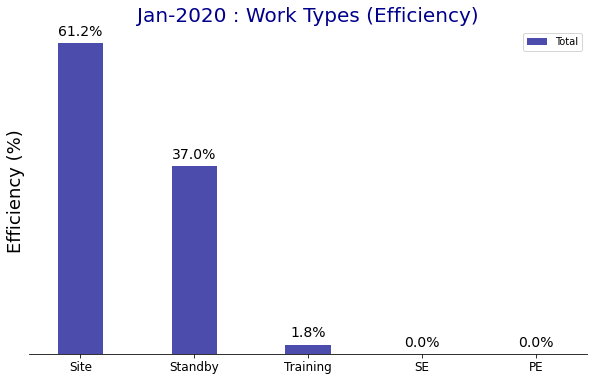

In [337]:
temp=emp(Type='Site,SE,Training,PE,Internal',Break=0,Time='months').time_mn_qt_wk(2020,1)
temp=temp.T
temp['Total']=temp.sum(axis=1)
temp=temp[['Total']]
temp.rename(index={'Internal':'Standby'},inplace=True)
temp.sort_values(by='Total',inplace=True,ascending=False)

temp=temp/act_hrs['Y2020']['M1']*100

temp=plot_barh(data=temp,figsize=(10,6),title='Jan-2020 : Work Types (Efficiency)',title_color='darkblue',
                   x_label='',y_label='Efficiency (%)',
                   width=0.4,offset=1.5,eff=True,alpha=0.7,bar_color='darkblue',annotate_color='black')


---

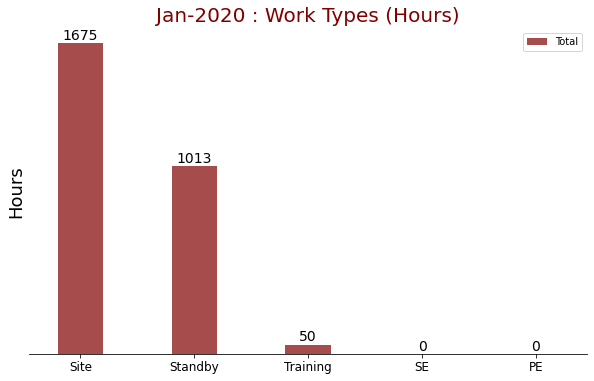

In [338]:
temp=emp(Type='Site,SE,Training,PE,Internal',Break=0,Time='months').time_mn_qt_wk(2020,1)
temp=temp.T
temp['Total']=temp.sum(axis=1)
temp=temp[['Total']]
temp.rename(index={'Internal':'Standby'},inplace=True)
temp.sort_values(by='Total',inplace=True,ascending=False)

temps=temp

temp=plot_barh(data=temp,figsize=(10,6),title='Jan-2020 : Work Types (Hours)',title_color='maroon',
                   x_label='',y_label='Hours',
                   width=0.4,offset=20,eff=False,alpha=0.7,bar_color='maroon',annotate_color='black')

---

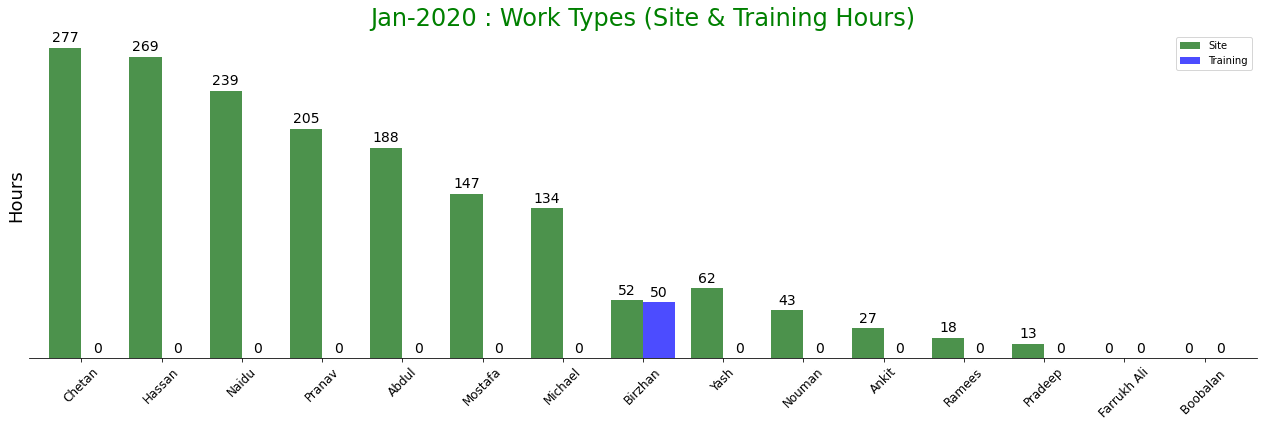

In [339]:
temp=emp(Type='Site,Training',Break=0,Time='months').time_mn_qt_wk(2020,1)
#temp=temp.T
#temp['Total']=temp.sum(axis=1)
#temp=temp[['Total']]
#temp.rename(index={'Internal':'Standby'},inplace=True)
#temp.sort_values(by='Total',inplace=True,ascending=False)
temp
#temps=temp

temp=plot_barh(data=temp,stacked=False,figsize=(22,6),title='Jan-2020 : Work Types (Site & Training Hours)',
               title_color='green',title_fontsize=24,
                   x_label='',x_label_rotation=45,y_label='Hours',
                   width=0.8,offset=5,eff=False,alpha=0.7,bar_color='darkgreen,blue,orange,royalblue,grey',annotate_color='black')
#temp.plot(kind='bar',stacked=False, figsize=(20,8),width=0.8)        

---

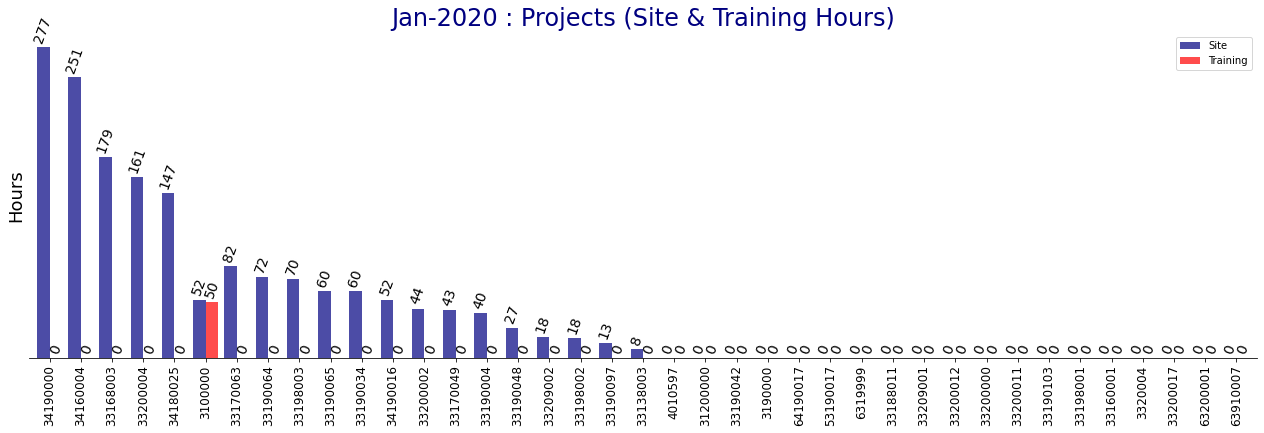

In [340]:
temp=projects(Type='Site,Training',Break=0,Time='months').time_mn_qt_wk(2020,1)
#temp=temp.T
#temp['Total']=temp.sum(axis=1)
#temp=temp[['Total']]
#temp.rename(index={'Internal':'Standby'},inplace=True)
#temp.sort_values(by='Total',inplace=True,ascending=False)
temp
#temps=temp

temp=plot_barh(data=temp,stacked=False,figsize=(22,6),title='Jan-2020 : Projects (Site & Training Hours)',title_color='navy',
                   title_fontsize=24,x_label='',x_label_rotation=90,y_label='Hours',
                   width=0.8,offset=5,eff=False,alpha=0.7,bar_color='navy,r',annotate_color='black',
                   annotate_rotation=70)
#temp.plot(kind='bar',stacked=False, figsize=(20,8),width=0.8)        

---

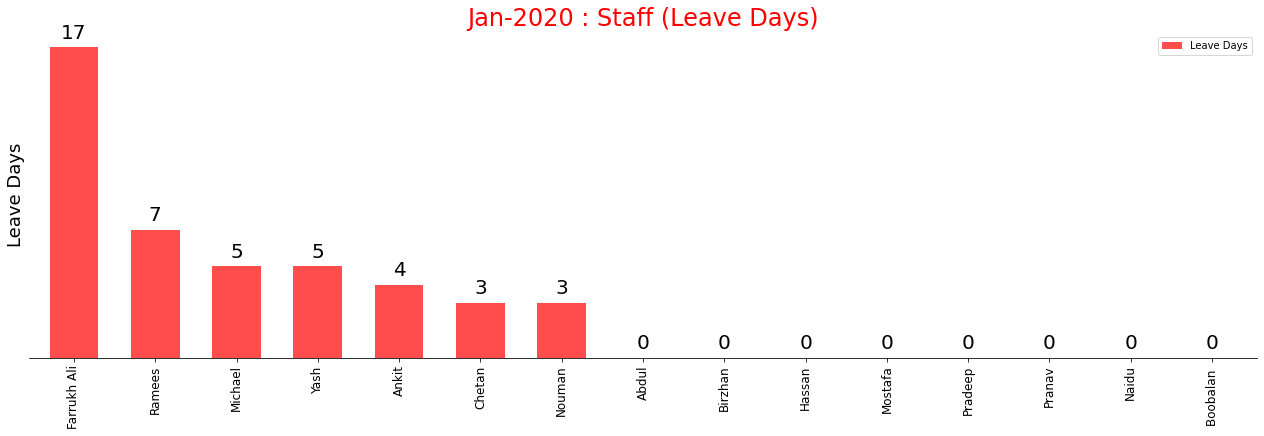

In [341]:

temp=occupancy(year=2020,time_m_q=1,duration='months')[['Leave Days']]
temp.sort_values(by='Leave Days',inplace=True,ascending=False)
temp
#temps=temp

temp=plot_barh(data=temp,stacked=False,figsize=(22,6),title='Jan-2020 : Staff (Leave Days)',title_color='red',
                   title_fontsize=24,x_label='',x_label_rotation=90,y_label='Leave Days',
                   width=0.6,offset=0.5,eff=False,alpha=0.7,bar_color='red',annotate_color='black',
                   annotate_rotation=0,annotate_fontsize=20)

#temp.plot(kind='bar',stacked=False, figsize=(20,8),width=0.8)        

---

[<h1 align=right><font size = 2>Go Back to TOC </font></h1>](#id0)
## Jan-2020 Occupancy Data

In [188]:
occupancy(year=2020,time_m_q=1,duration='months')

,Total Days,Public,Working Days,Leave Days,Site Hours,Site Travel Hours,PE Hours,SE Hours,Training Hours
Abdul,31,8.0,23.0,0.0,188.0,0.0,0.0,0.0,0.0
Birzhan,31,8.0,23.0,0.0,52.0,20.0,0.0,0.0,50.0
Chetan,31,6.0,22.0,3.0,277.3,10.0,0.0,0.0,0.0
Farrukh Ali,31,9.0,5.0,17.0,0.0,0.0,0.0,0.0,0.0
Hassan,31,2.0,29.0,0.0,269.0,29.0,0.0,0.0,0.0
Michael,31,0.0,26.0,5.0,134.0,4.0,0.0,0.0,0.0
Mostafa,31,4.0,27.0,0.0,147.0,6.0,0.0,0.0,0.0
Nouman,31,9.0,19.0,3.0,43.0,19.0,0.0,0.0,0.0
Pradeep,31,9.0,22.0,0.0,13.0,3.0,0.0,0.0,0.0
Pranav,31,3.0,28.0,0.0,205.0,49.0,0.0,0.0,0.0


---
## 2. Quarterly Reports:

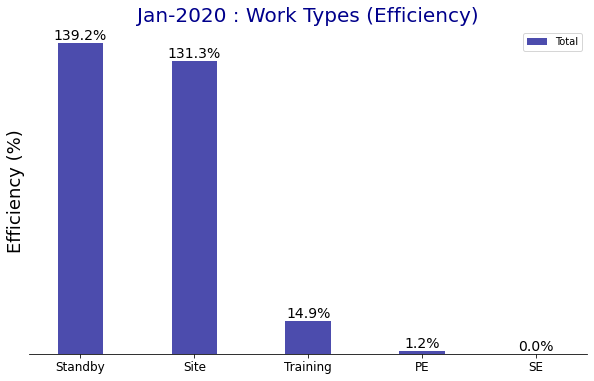

In [342]:
temp=emp(Type='Site,SE,Training,PE,Internal',Break=0,Time='quarters').time_mn_qt_wk(2020,1)
temp=temp.T
temp['Total']=temp.sum(axis=1)
temp=temp[['Total']]
temp.rename(index={'Internal':'Standby'},inplace=True)
temp.sort_values(by='Total',inplace=True,ascending=False)

temp=temp/act_hrs['Y2020']['M1']*100

temp=plot_barh(data=temp,figsize=(10,6),title='Jan-2020 : Work Types (Efficiency)',title_color='darkblue',
                   x_label='',y_label='Efficiency (%)',
                   width=0.4,offset=1.5,eff=True,alpha=0.7,bar_color='darkblue',annotate_color='black')


# 2. Yearly Report

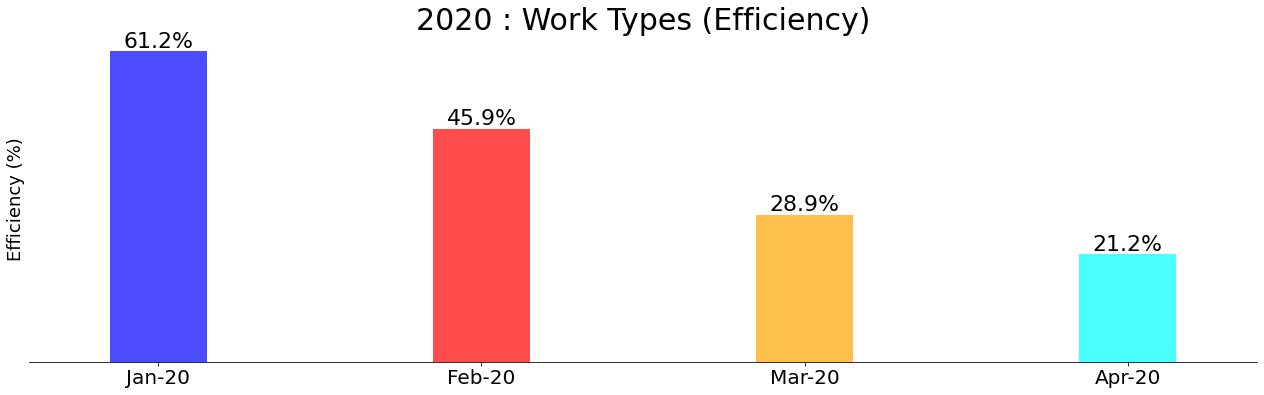

In [347]:
temp0=emp(Type='Site',Break=0,Time='months').time_mn_qt_wk(2020)
temp0=temp0.T
temp0['Site']=temp0.sum(axis=1)
temp0=temp0[['Site']]
#---------------------------
temp1=emp(Type='SE',Break=0,Time='months').time_mn_qt_wk(2020)
temp1=temp1.T
temp1['SE']=temp1.sum(axis=1)
temp1=temp1[['SE']]
temp1.rename(index={'Jan-20_x':'Jan-20'},inplace=True)
temp1.drop('Jan-20_y',axis=0,inplace=True)
#-----------
temp2=emp(Type='Training',Break=0,Time='months').time_mn_qt_wk(2020)
temp2=temp2.T
temp2['Training']=temp2.sum(axis=1)
temp2=temp2[['Training']]
temp2
#-----------
temp3=emp(Type='PE',Break=0,Time='months').time_mn_qt_wk(2020)
temp3=temp3.T
temp3['PE']=temp3.sum(axis=1)
temp3=temp3[['PE']]
temp3.rename(index={'Jan-20_x':'Jan-20'},inplace=True)
temp3.drop('Jan-20_y',axis=0,inplace=True)
temp3
#-----------
temp4=emp(Type='Internal',Break=0,Time='months').time_mn_qt_wk(2020)
temp4=temp4.T
temp4['Standby']=temp4.sum(axis=1)
temp4=temp4[['Standby']]
temp4
#-----------------
output=pd.concat([temp0,temp1,temp2,temp3,temp4],axis=1)

output.iloc[0:1]=output.iloc[0:1]/aHRS[1]['Total']*100
output.iloc[1:2]=output.iloc[1:2]/aHRS[2]['Total']*100
output.iloc[2:3]=output.iloc[2:3]/aHRS[3]['Total']*100
output.iloc[3:4]=output.iloc[3:4]/aHRS[4]['Total']*100
output=output['Site']

temp=plot_barh(data=output,figsize=(22,6),title='2020 : Work Types (Efficiency)',title_color='black',title_fontsize=30,
                   x_label='',xticks_fontsize=20,y_label='Efficiency (%)',
                   width=0.3,offset=0.8,eff=True,alpha=0.7,bar_color='blue,red,orange,cyan,teal,darkred',
               annotate_color='black',annotate_fontsize=22)